In [336]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.special import jv, jn_zeros, jnp_zeros
import torch
import math

import sys
sys.path.append('..')
from imitation_learning.model.modules.harmonics import DiskHarmonics

In [357]:
def Phi(phi, M):
    Phi = []
    for m in range(M):
        Phi.append((1/np.sqrt(2*np.pi)) * np.exp(1j * m * phi))
    return Phi

def N_n(n, m, a):
    k = n**2+m
    return a**2 / 2 * jv(m+1, k*a)**2
    
def R(r, M, N, a):
    R = []
    for n in range(1,N+1):
        ns = []
        for m in range(M):
            k = n**2+m
            ns.append(1 / np.sqrt(N_n(n,m,a)) * jv(m, k*r))
        R.append(ns)
    return R

In [359]:
M = 3
N = 2
a=1

phis = np.linspace(0,2*np.pi, 360)
radii = np.linspace(0,1,100)

In [370]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

def Psi(n, m, a, r, phi):
    #x_nm = jn_zeros(m, n)
    x_nm = jnp_zeros(m, n)
    k_nm = x_nm / a
    #N = a**2 / 2 * jv(m+1, x_nm[n-1])**2
    N = ((a**2.)/2.)*(1. - (m**2.)/(x_nm[n-1]**2.))*(jv(m, x_nm[n-1])**2.)
    R = 1 / np.sqrt(N) * jv(m, k_nm[n-1]*r)
    Phi = 1 / np.sqrt(2*np.pi) * np.exp(1j * m * phi)
    return [R.reshape(100,1) @ Phi.reshape(1,360)]

basis = []
for n in range(1,N+1):
    b = list()
    for m in range(M+1):
        b.extend(Psi(n,m,a,radii,phis))
    basis.append(b)
basis = np.array(basis)
print(basis.shape)

(2, 4, 100, 360)


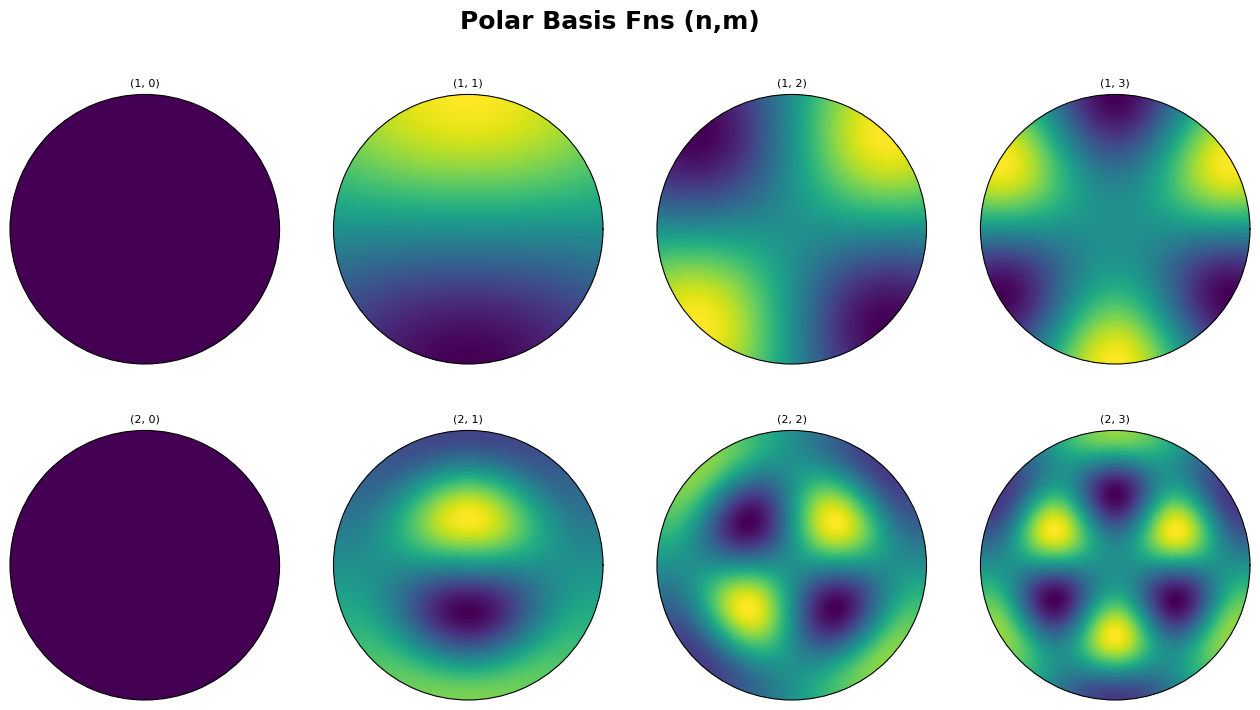

In [376]:
import math
fig, ax = plt.subplots(ncols=M+1, nrows=N, subplot_kw={'projection': 'polar'}, figsize=(16,8))
for n in range(N):
    for m in range(M+1):
        pc = ax[n][m].pcolormesh(phis,radii,basis[n,m].imag)
        ax[n][m].grid(False)
        ax[n][m].set_yticklabels([])
        ax[n][m].set_xticklabels([])
        ax[n][m].set_title(f"({n+1}, {m})", fontsize=8)
fig.suptitle("Polar Basis Fns (n,m)", fontsize=18, fontweight='bold')
plt.show()

In [368]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

def Psi(n, m, a, r, phi):
    #x_nm = jn_zeros(m, n)
    x_nm = jnp_zeros(m, n)
    k_nm = x_nm / a
    #N = a**2 / 2 * jv(m+1, x_nm[n-1])**2
    N = ((a**2.)/2.)*(1. - (m**2.)/(x_nm[n-1]**2.))*(jv(m, x_nm[n-1])**2.)
    R = 1 / np.sqrt(N) * jv(m, k_nm[n-1]*r)
    Phi = Psi_basis(m, phi)
    if m == 0:
        return [R.reshape(100,1) @ Phi[0].reshape(1,360)]
    else:
        return [R.reshape(100,1) @ Phi[0].reshape(1,360), R.reshape(100,1) @ Phi[1].reshape(1,360)]

basis = []
for n in range(1,N+1):
    b = list()
    for m in range(M+1):
        b.extend(Psi(n,m,a,radii,phis))
    basis.append(b)
basis = np.array(basis)
print(basis.shape)

(2, 7, 100, 360)


In [355]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

def Psi(n, m, a, r, phi):
    #x_nm = jn_zeros(m, n)
    x_nm = jnp_zeros(m, n)
    k_nm = x_nm / a
    #N = a**2 / 2 * jv(m+1, x_nm[n-1])**2
    N = ((a**2.)/2.)*(1. - (m**2.)/(x_nm[n-1]**2.))*(jv(m, x_nm[n-1])**2.)
    R = 1 / np.sqrt(N) * jv(m, k_nm[n-1]*r)
    #Phi = 1 / np.sqrt(2*np.pi) * np.exp(1j * m * phi)
    Phi = Psi_basis(m, phi)
    if m == 0:
        return [R.reshape(100,1) @ Phi[0].reshape(1,360)]
    else:
        return [R.reshape(100,1) @ Phi[0].reshape(1,360), R.reshape(100,1) @ Phi[1].reshape(1,360)]

basis = []
for n in range(1,N+1):
    b = list()
    for m in range(M+1):
        b.extend(Psi(n,m,a,radii,phis))
    basis.append(b)
basis = np.array(basis)
print(basis.shape)

(5, 11, 100, 360)


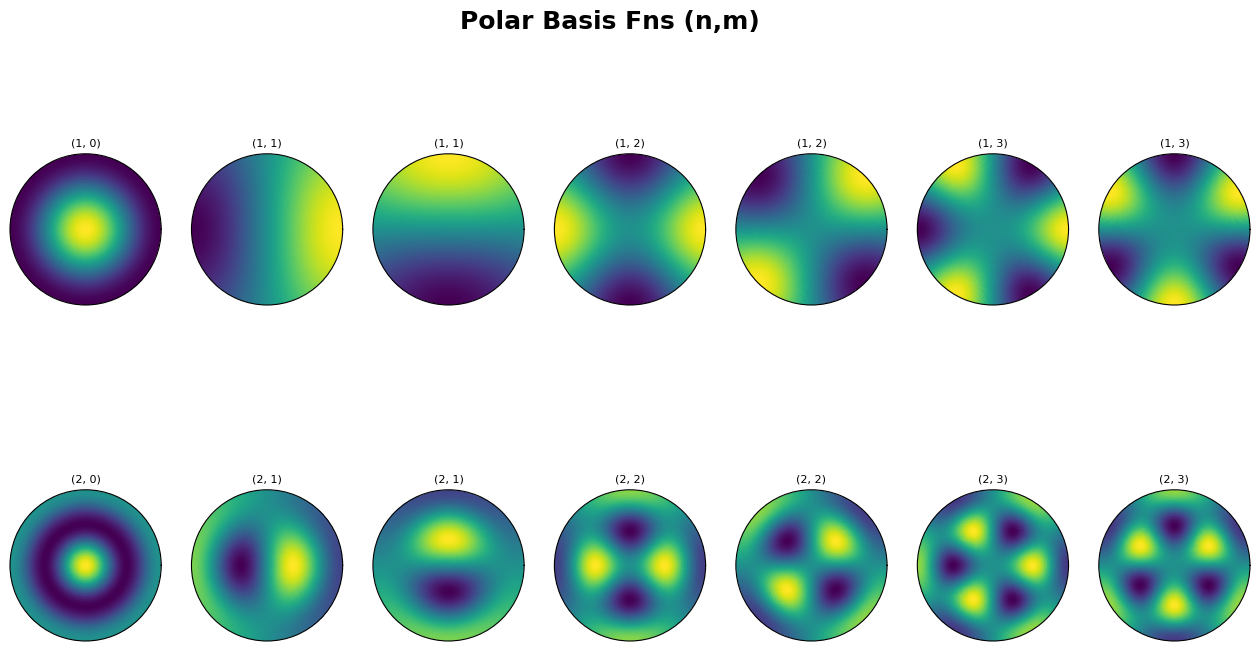

In [369]:
import math
fig, ax = plt.subplots(ncols=M*2+1, nrows=N, subplot_kw={'projection': 'polar'}, figsize=(16,8))
for n in range(N):
    for m in range(M*2+1):
        pc = ax[n][m].pcolormesh(phis,radii,basis[n,m].real)
        ax[n][m].grid(False)
        ax[n][m].set_yticklabels([])
        ax[n][m].set_xticklabels([])
        ax[n][m].set_title(f"({n+1}, {0 if m == 0 else math.ceil(m/2)})", fontsize=8)
fig.suptitle("Polar Basis Fns (n,m)", fontsize=18, fontweight='bold')
plt.show()

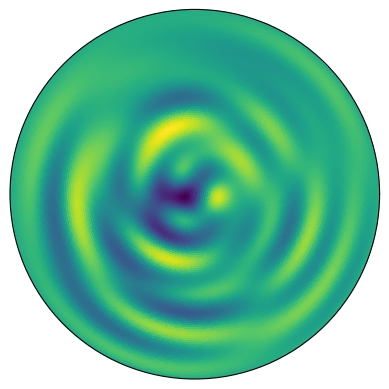

In [309]:
coeffs = np.random.uniform(-1,1,size=(1, N, M*2+1))
f = np.einsum("inm,nmt->t", coeffs, basis.reshape(N,M*2+1,-1))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.pcolormesh(phis,radii,f.real.reshape(100,360))
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [ ]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

fig, ax = plt.subplots(nrows=M+1, ncols=2, subplot_kw={'projection': 'polar'})
for m in range(M+1):
    psi_basis = Psi_basis(m, phis)
    ax[m][0].plot(phis, psi_basis[0])
    if m > 0:
        ax[m][1].plot(phis, psi_basis[1])
    #ax[n][m].pcolormesh(phis,radii,basis[n,m].real)
    ax[m][0].grid(False)
    ax[m][0].set_yticklabels([])
    ax[m][0].set_xticklabels([])
    ax[m][1].grid(False)
    ax[m][1].set_yticklabels([])
    ax[m][1].set_xticklabels([])
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=M+1, ncols=2, subplot_kw={'projection': 'polar'})
for m in range(M+1):
    psi_basis = (1/np.sqrt(2*np.pi)) * np.exp(1j * m * phis)
    ax[m][0].plot(phis, psi_basis.real)
    ax[m][1].plot(phis, psi_basis.imag)
    ax[m][0].grid(False)
    ax[m][0].set_yticklabels([])
    ax[m][0].set_xticklabels([])
    ax[m][1].grid(False)
    ax[m][1].set_yticklabels([])
    ax[m][1].set_xticklabels([])
plt.show()

In [247]:
disk_harmonics = DiskHarmonics(N,M,a,100,360)
basis = disk_harmonics.basis_fns.detach().numpy().reshape(3,7,100,360)

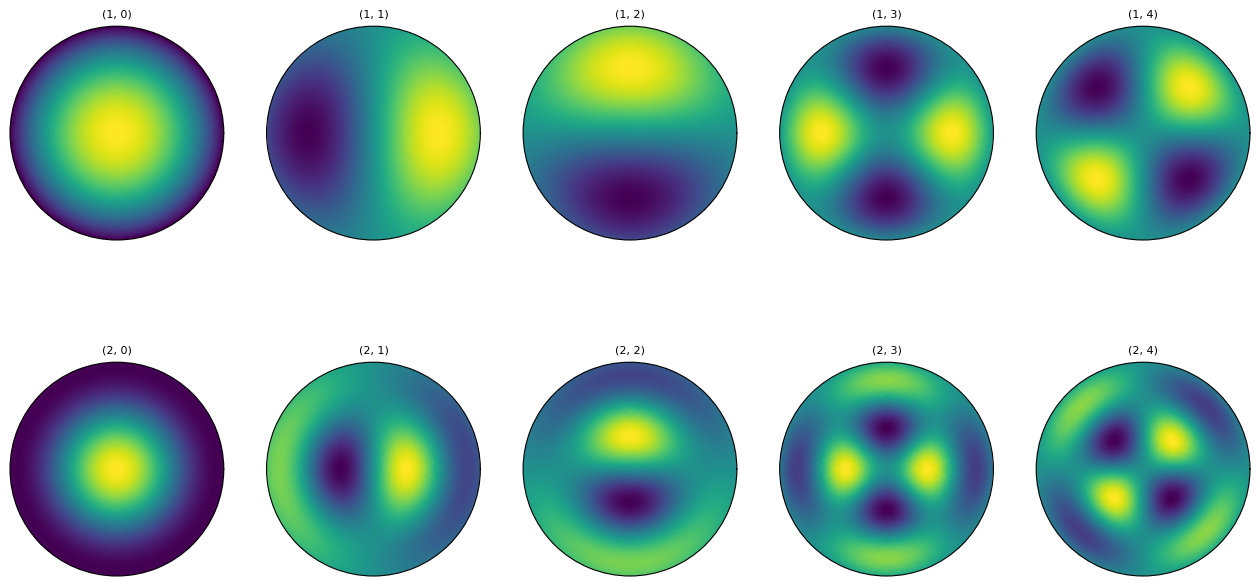

In [19]:
fig, ax = plt.subplots(ncols=M*2+1, nrows=N, subplot_kw={'projection': 'polar'}, figsize=(16,8))
for n in range(N):
    for m in range(M*2+1):
        ax[n][m].pcolormesh(phis,radii,basis[n,m].real)
        ax[n][m].grid(False)
        ax[n][m].set_yticklabels([])
        ax[n][m].set_xticklabels([])
        ax[n][m].set_title(f"({n+1}, {m})", fontsize=8)
plt.show()

In [ ]:
coeffs = np.random.uniform(-10,10,size=(1, N, M*2+1))
f = disk_harmonics.evaluate(torch.from_numpy(coeffs).float())

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.pcolormesh(phis,radii,f.real.reshape(100,360))
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [ ]:
f = disk_harmonics.evaluate(
    torch.from_numpy(coeffs).float(),
    torch.from_numpy(radii).float(),
    torch.from_numpy(phis).float()
)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.pcolormesh(phis,radii,f.real.reshape(100,360))
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [316]:
def fb(n,m,a,r):
    x_nm = jn_zeros(m, n)
    k_nm = x_nm / a
    N = a**2 / 2 * jv(m+1, x_nm[n-1])**2
    return (1 / np.sqrt(N)) * jv(m, k_nm[n-1]*r)

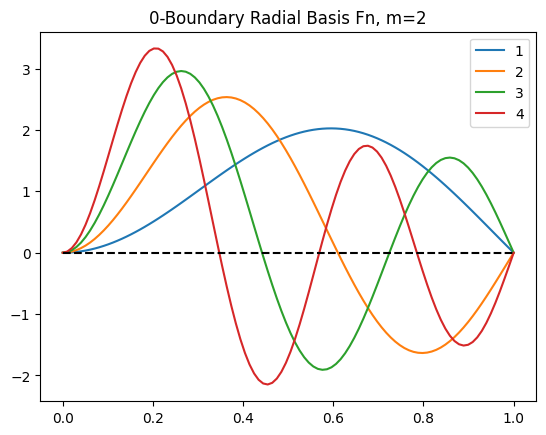

In [322]:
x = np.linspace(0,1,100)
for n in range(1,5):
    plt.plot(x,fb(n,2,1.0,x), label=f"{n}")
plt.plot(x,[0] * 100, c='black', linestyle='dashed')
plt.legend()
plt.title("0-Boundary Radial Basis Fn, m=2")
plt.show()

In [324]:
def fb(n,m,a,r):
    x_nm = jnp_zeros(m, n)
    k_nm = x_nm / a
    N = ((a**2.)/2.)*(1. - (m**2.)/(x_nm[n-1]**2.))*(jv(m, x_nm[n-1])**2.)
    return (1 / np.sqrt(N)) * jv(m, k_nm[n-1]*r)

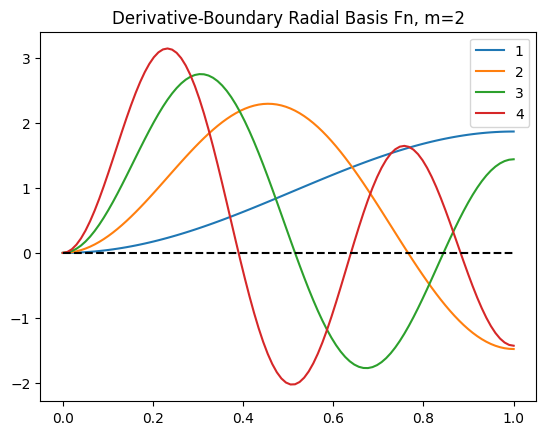

In [325]:
x = np.linspace(0,1,100)
for n in range(1,5):
    plt.plot(x,fb(n,2,1.0,x), label=f"{n}")
plt.plot(x,[0] * 100, c='black', linestyle='dashed')
plt.legend()
plt.title("Derivative-Boundary Radial Basis Fn, m=2")
plt.show()